# Diabetes prediction

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
%cd drive/MyDrive
#!ls
!pip install sklearn

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [216]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Data loading

In [217]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
print(df.shape)
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [220]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [221]:
df.isnull().sum()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [222]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for column in zero_columns:
  df[column] = df[column].replace(0, df[column].median())

# Data visualization

Text(0.5, 0.98, 'Histograms')

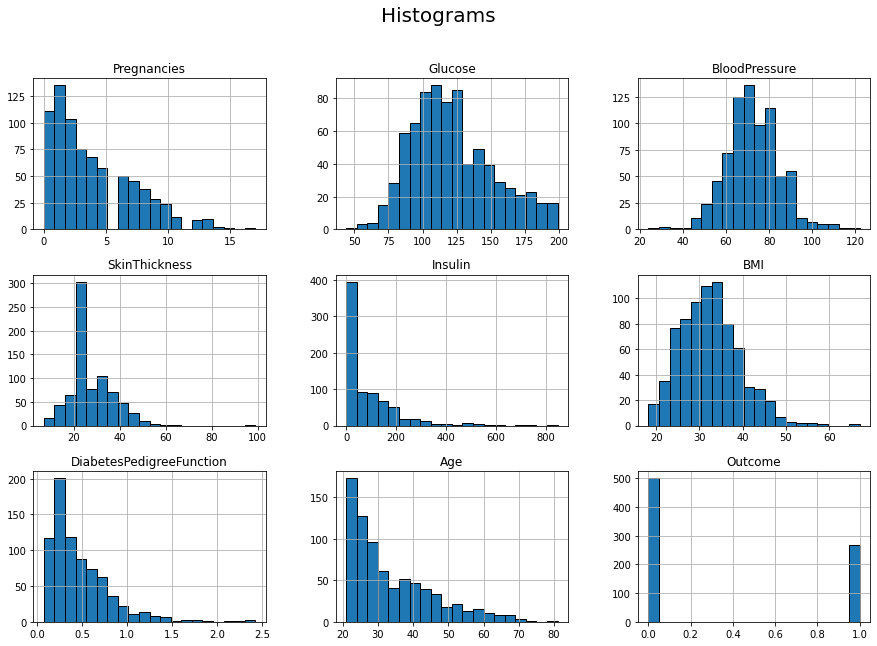

In [223]:
df.hist(bins=20, figsize=(10,10), edgecolor='black')
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.suptitle('Histograms', fontsize=20)

Text(0.5, 0.98, 'Density plots')

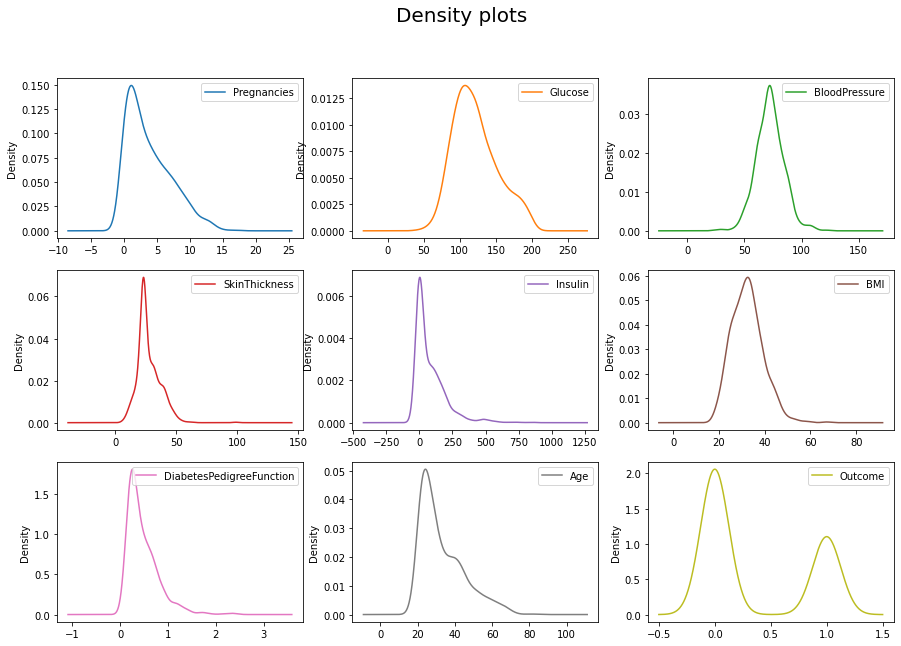

In [224]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize =(10,10))
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.suptitle('Density plots', fontsize=20)

Text(0.5, 0.98, 'Box plots')

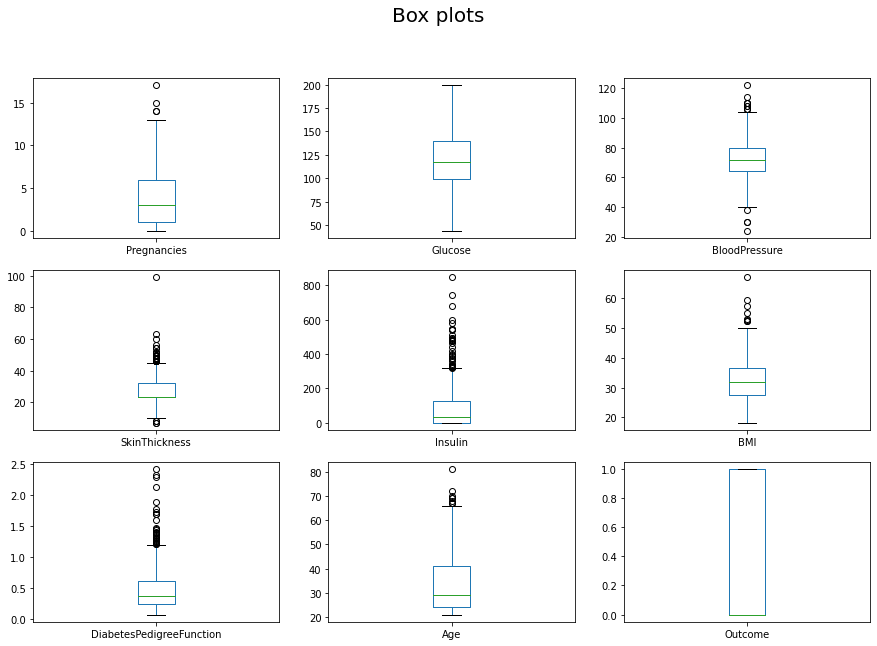

In [225]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize =(10,10))
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.suptitle('Box plots', fontsize=20)

Text(0.5, 1.0, 'Correlation matrix')

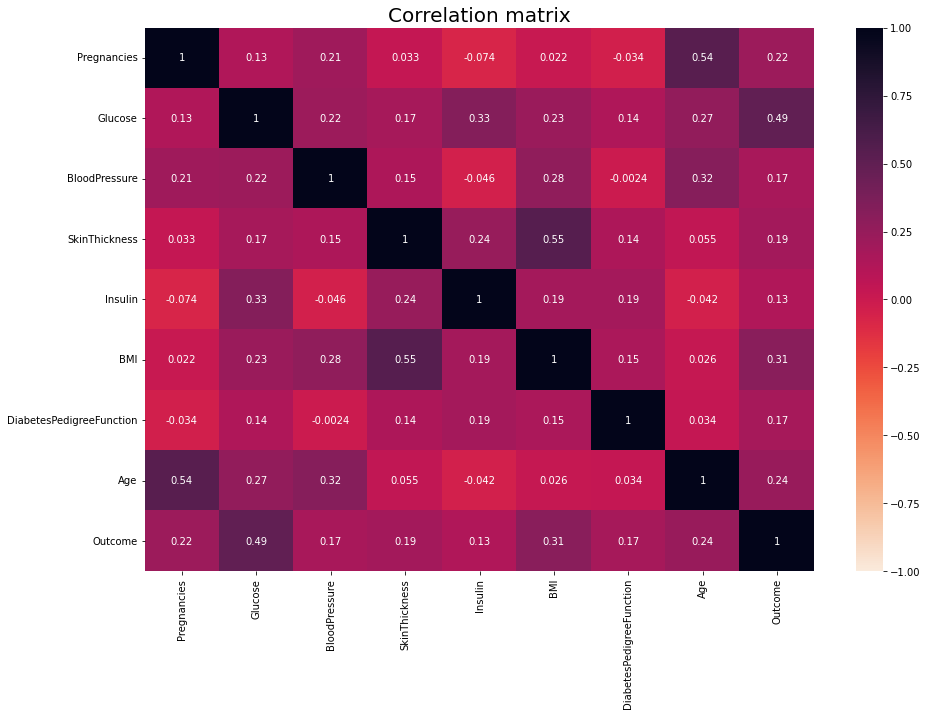

In [226]:
plt.figure(figsize=(15, 10))
matrix = sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='rocket_r')
matrix.set_title('Correlation matrix', fontsize=20)

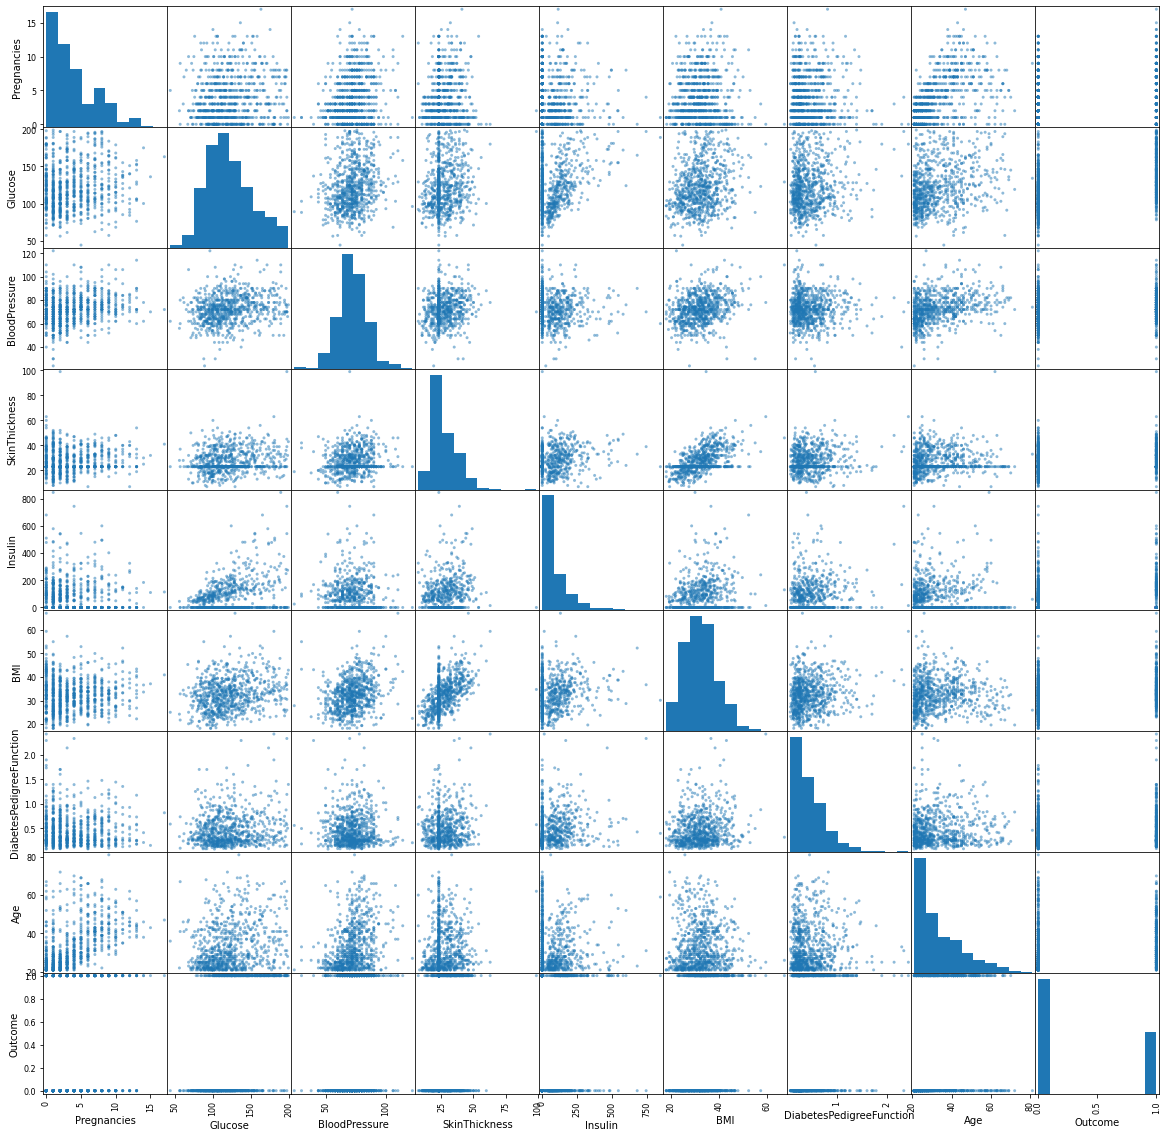

In [227]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

# Train test split

In [228]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print(y_train.shape)
print(y_test.shape)

(652,)
(116,)


# Naive Bayes classifier

In [229]:
def plot_cf_matrix(y1, y2, labels):
  cm = confusion_matrix(y1, y2, labels=labels)
  cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  cm_disp.plot()
  plt.show()

Grid search best score 0.7500551735845853
Grid search best params {'var_smoothing': 0.0001}
Train accuracy 0.745398773006135
Test accuracy 0.8103448275862069
Train confusion matrix:


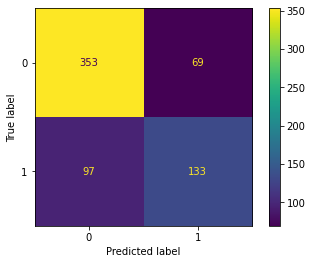

Test confusion matrix:


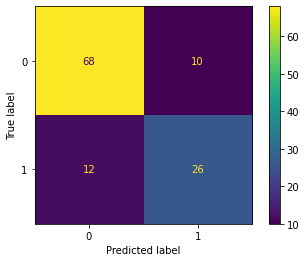

Final confusion matrix:


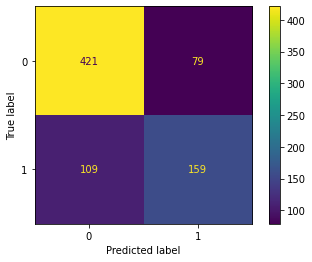

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

parameters = {'var_smoothing': [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001]}

gnb = GaussianNB()
gs = GridSearchCV(gnb, parameters, scoring='accuracy')
gs.fit(X, y)

print('Grid search best score', gs.best_score_)
print('Grid search best params', gs.best_params_)

y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Train accuracy', train_acc)
print('Test accuracy', test_acc)

print('Train confusion matrix:')
plot_cf_matrix(y_train, y_pred_train, labels=gs.classes_)

print('Test confusion matrix:')
plot_cf_matrix(y_test, y_pred_test, labels=gs.classes_)

print('Final confusion matrix:')
plot_cf_matrix(np.append(y_train, y_test), np.append(y_pred_train, y_pred_test), labels=gs.classes_)

gnb = gs

# Decision tree

Grid search best score 0.7474577709871827
Grid search best params {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Train accuracy 0.8297546012269938
Test accuracy 0.853448275862069
Train confusion matrix:


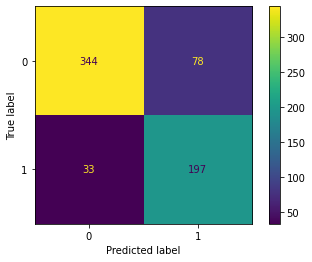

Test confusion matrix:


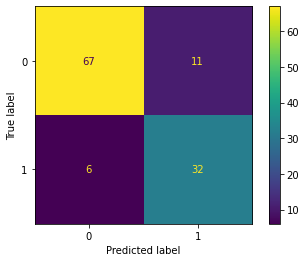

Final confusion matrix:


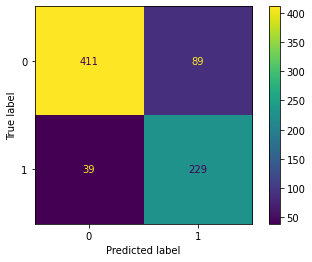

In [231]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': list(range(1,10))}
dtc = DecisionTreeClassifier()

gs = GridSearchCV(dtc, parameters, scoring='accuracy')
gs.fit(X, y)

print('Grid search best score', gs.best_score_)
print('Grid search best params', gs.best_params_)

y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Train accuracy', train_acc)
print('Test accuracy', test_acc)

print('Train confusion matrix:')
plot_cf_matrix(y_train, y_pred_train, labels=gs.classes_)

print('Test confusion matrix:')
plot_cf_matrix(y_test, y_pred_test, labels=gs.classes_)

print('Final confusion matrix:')
plot_cf_matrix(np.append(y_train, y_test), np.append(y_pred_train, y_pred_test), labels=gs.classes_)

dtc = gs

# SVM

In [232]:
from sklearn.preprocessing import StandardScaler

X2 = pd.DataFrame(StandardScaler().fit_transform(X),
                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                           'BMI', 'DiabetesPedigreeFunction', 'Age'])

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, random_state=0)

print(y_train.shape)
print(y_test.shape)

(652,)
(116,)


Grid search best score 0.7695526695526695
Grid search best params {'C': 0.2, 'kernel': 'rbf'}
Train accuracy 0.799079754601227
Test accuracy 0.853448275862069
Train confusion matrix:


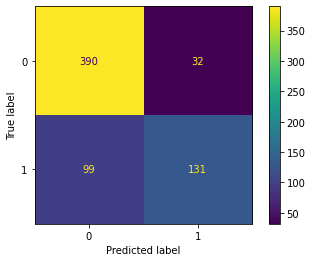

Test confusion matrix:


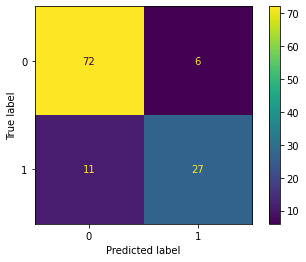

Final confusion matrix:


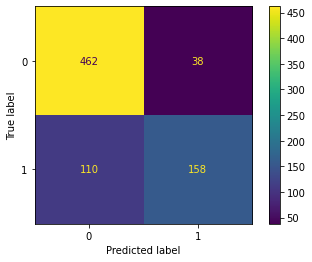

In [233]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'poly', 'rbf'),
              'C':[0.2, 0.3]}
svm = SVC()

gs = GridSearchCV(svm, parameters, scoring='accuracy')
gs.fit(X2, y)

print('Grid search best score', gs.best_score_)
print('Grid search best params', gs.best_params_)

y_pred_train = gs.predict(X_train)
y_pred_test = gs.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('Train accuracy', train_acc)
print('Test accuracy', test_acc)

print('Train confusion matrix:')
plot_cf_matrix(y_train, y_pred_train, labels=gs.classes_)

print('Test confusion matrix:')
plot_cf_matrix(y_test, y_pred_test, labels=gs.classes_)

print('Final confusion matrix:')
plot_cf_matrix(np.append(y_train, y_test), np.append(y_pred_train, y_pred_test), labels=gs.classes_)

svm = gs

# Results review

In [234]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

def get_alg_review(alg, X, y):
  y_pred = alg.predict(X)

  r = {
      'Accuracy': accuracy_score(y, y_pred),
      'F1': f1_score(y, y_pred),
      'Precision': precision_score(y, y_pred),
      'Recall': recall_score(y, y_pred),
      'ROC': roc_auc_score(y, y_pred)  
  }
  return r


def print_alg_review(r):
  for metric, value in r.items():
    print('{:>15}: {:<.3}'.format(metric, value)) 
  print()
  

In [235]:
print('Naive Bayes classifier:')
gnb_r = get_alg_review(gnb, X, y)
print_alg_review(gnb_r)

print('Decision tree:')
dtc_r = get_alg_review(dtc, X, y)
print_alg_review(dtc_r)

print('SVM:')
svm_r = get_alg_review(svm, X2, y)
print_alg_review(svm_r)


Naive Bayes classifier:
       Accuracy: 0.755
             F1: 0.628
      Precision: 0.668
         Recall: 0.593
            ROC: 0.718

Decision tree:
       Accuracy: 0.833
             F1: 0.782
      Precision: 0.72
         Recall: 0.854
            ROC: 0.838

SVM:
       Accuracy: 0.807
             F1: 0.681
      Precision: 0.806
         Recall: 0.59
            ROC: 0.757



In [236]:
def plot_alg_review(algs, metric, values):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_title('{} comparison'.format(metric))
  ax.bar(algs, values)
  plt.xlabel('Algorithm')
  plt.ylabel(metric)
  plt.show()

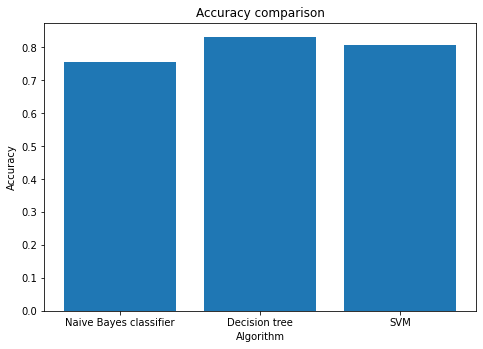

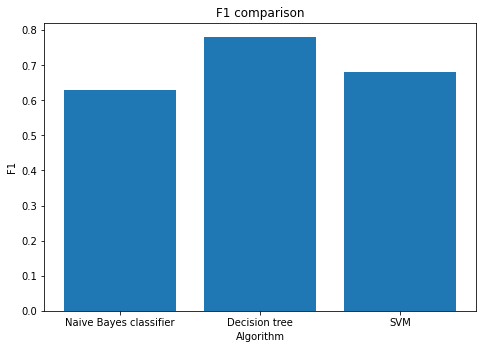

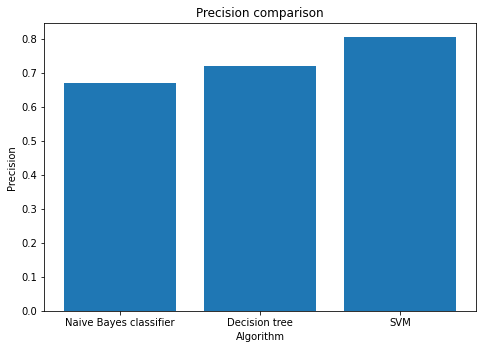

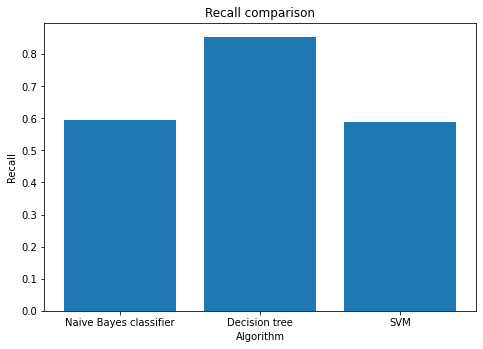

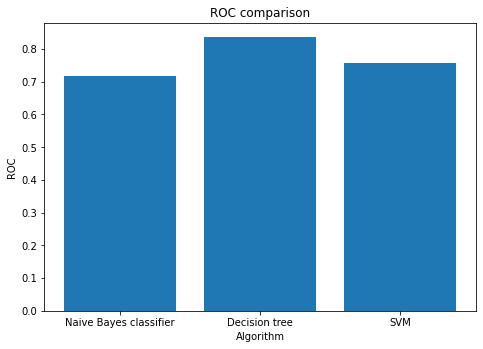

In [237]:
algs = ['Naive Bayes classifier', 'Decision tree', 'SVM']

dl = [gnb_r, dtc_r, svm_r]
d = {}

for k in gnb_r.keys():
  d[k] = tuple(d[k] for d in dl)

# for k,v in d.items():
#   print(k, v)

for key, value in d.items():
  plot_alg_review(algs=algs, metric=key, values=value)

#Vrsta istraživanja provedenog u članku prema:

*   svrsi - primijenjeno istraživanje, cilj istraživanja je razvoj modela za   detekciju dijabetesa na temelju poznatih varijabli

*   izvoru informacija - sekundarno istraživanje, podaci koji se koriste u istraživanju otprije su poznati

*   vremenu provedbe - studija presjeka, koriste se podaci o pojedincima koji su bili istini u određenom trenutku

*   načinu prikupljanja podataka - mješovito istraživanje, kombiniraju se rezultati iz sekundarnih i primarnih izvora kroz terensko ili laboratorijsko istraživanje

*   vrsti korištenih podataka - kvantitativno istraživanje, koriste se mjerljive varijable

*   stupnju manipulacije varijablama - promatračko istraživanje, vrijednosti prikupljenih varijabli promatraju se u svom prirodnom kontekstu, bez utjecaja na njihove vrijednosti

*   dubini - korelacijsko istraživanje, uspostavlja se odnos između više varijabli kako bi se utvrdio njihov utjecaj na pojavu dijabetesa (ciljna varijabla) 

*   vrsti zaključka - hipotetičko-deduktivno istraživanje, na temelju podataka postavlja se hipoteza o dijagnozi dijabetesa, koja se zatim može provjeriti validacijom modela




# Metode prikupljanja podataka u članku:
*   Opservacijsko istraživanje - minimiziran utjecaj istraživača na vrijednosti varijabli korištenih u istraživanju, koriste se zapažene vrijednosti koje bi bile identične i da se istraživanje ne provodi      


# Etičnost prikupljanja i objave podataka:
*   Podaci su prikupljeni na etičan način
*   Nije u potpunosti etično to što pojedincima čiji su podaci objavljeni nije rečeno da će biti objavljeni i koliko dugo će se koristiti

